Text classification with Naive Bayes

In [72]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame
import seaborn as sns

#load dataset
from sklearn.datasets import fetch_20newsgroups
news_data = fetch_20newsgroups()
#print('Feature:', iris.feature_names)
#print('\nTarget:', iris.target_names)
#dframe = DataFrame(iris.data, columns=iris.feature_names)
#information stored in the dataset
print(news_data.keys())

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])


In [100]:
#news group classification
cat=news_data.target_names
print(np.unique(news_data.target))
cat

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [101]:
# Split dataset into train and test set
train, test = fetch_20newsgroups(subset='train',categories=cat), fetch_20newsgroups(subset='test',categories=cat)
print('Total observations: %s\n' % len(news_data.data))
print('Training observations: %s\n' % len(train.data))
print('Testing observations: %s\n' % len(test.data))
print(test.data[20])

Total observations: 11314

Training observations: 11314

Testing observations: 7532

From: Matjaz.Gams@IJS.si
Subject: ``Call for Papers for INFORMATIKA'' Vol. 17 No. 2
Originator: abrodnik@watdragon.uwaterloo.ca
Organization: Jozef Stefan Institute, Ljubljana, Slovenia
Lines: 69

This is an invitation to send articles to the Informatica magazine.
The first fully international issue has been published and echoes 
are quite favourable. For any information, contact (matjaz.gams@ijs.si). 

Dear Colleague,                                        April 25, 1993

Number 1 of volume 17 of Informatica is now out of print and some of you 
will receive it in a week or so. As you will see, the journal is structured
in the following way: the editorial (first page); profiles (second page
-- biography of an editor, in this issue, Terry Winograd); the edited
part of papers (pp. 3-80); mission and research reports (A plan for
knowledge archives project in Japan and CSLI in Stanford, pp. 81-100);
and ne

In [104]:
#%% Fitting Naive Bayes Classification to dataset

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.pipeline import Pipeline

vectorizer = TfidfVectorizer("english")
#nbreg = GaussianNB()
nbreg = MultinomialNB(alpha=0.1, class_prior=None, fit_prior=True)

model = Pipeline(steps=[('TfidfVectorizer',vectorizer),('regressor', nbreg)])
model.fit(train.data,train.target)
print(model)

Pipeline(memory=None,
         steps=[('TfidfVectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='english',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('regressor',
                 MultinomialNB(alpha=0.1, class_prior=None, fit_prior=True))],
         verbose=False)


,alt.atheism,comp.graphics,comp.os.ms-windows.misc,comp.sys.ibm.pc.hardware,comp.sys.mac.hardware,comp.windows.x,misc.forsale,rec.autos,rec.motorcycles,rec.sport.baseball,rec.sport.hockey,sci.crypt,sci.electronics,sci.med,sci.space,soc.religion.christian,talk.politics.guns,talk.politics.mideast,talk.politics.misc,talk.religion.misc
alt.atheism,229,0,0,2,0,1,0,0,1,1,1,2,0,5,4,60,4,5,1,3
comp.graphics,0,277,15,18,6,21,3,2,0,2,0,16,11,1,11,3,2,1,0,0
comp.os.ms-windows.misc,1,20,260,53,3,17,1,0,4,3,2,14,1,1,5,7,1,0,0,1
comp.sys.ibm.pc.hardware,0,5,23,307,17,1,7,3,0,1,0,3,20,0,5,0,0,0,0,0
comp.sys.mac.hardware,0,5,8,15,322,1,7,6,1,2,0,5,6,1,3,1,2,0,0,0
comp.windows.x,1,31,17,9,5,313,1,0,2,0,0,6,1,2,4,1,2,0,0,0
misc.forsale,0,4,5,29,11,0,295,14,6,2,5,0,10,5,2,2,0,0,0,0
rec.autos,0,1,1,5,0,1,5,361,7,2,2,0,4,1,2,0,3,0,1,0
rec.motorcycles,0,0,0,1,0,0,2,6,386,0,0,1,2,0,0,0,0,0,0,0
rec.sport.baseball,0,0,0,0,1,0,1,4,0,370,15,1,0,0,1,1,1,2,0,0


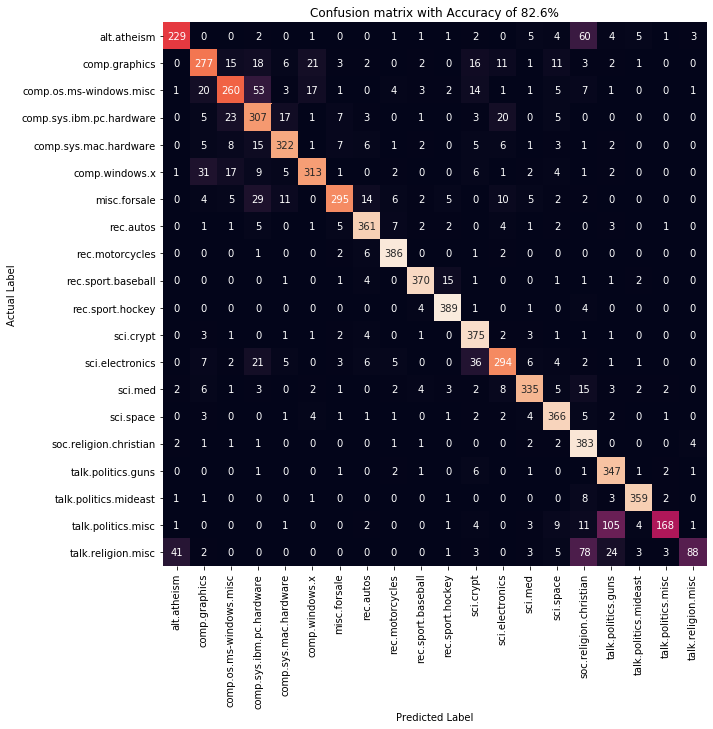

In [113]:
#test prediction
labels_pred=model.predict(test.data)
#target_pred=DataFrame(labeler.inverse_transform(target_pred), index=test['species'].index)

from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error, r2_score
model_acurracy=accuracy_score(test.target, labels_pred)
labels = news_data.target_names
cm = confusion_matrix(test.target, labels_pred)
cm = DataFrame(cm,index=labels,columns=labels)
plt.figure(figsize= (20,10))
sns.heatmap(cm, annot=True, fmt ='d', square=True, cbar=False, xticklabels=train.target_names,
            yticklabels=train.target_names)
plt.title('Confusion matrix with Accuracy of %.1f%%' % (model_acurracy * 100.0))
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')

cm

In [125]:
#forward prediction

labels_pred=news_data.target_names[model.predict(['Jesus Christ is Lord'])[0]]
print(labels_pred)

soc.religion.christian


In [129]:
#forward prediction
labels_pred=news_data.target_names[model.predict(['The vaccine for Corona virus is being developed'])[0]]
print(labels_pred)

sci.med


In [122]:
#forward prediction
labels_pred=news_data.target_names[model.predict(['Foreign Minister of Malaysia'])[0]]
print(labels_pred)

talk.politics.mideast
